# A simple demo of the package

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()
import pickle

import sparseRRR

In [2]:
def preprocess(data):
    X = data['counts'][:,data['mostVariableGenes']] / np.sum(data['counts'], axis=1) * 1e+6
    X = np.array(X)
    X = np.log2(X + 1)
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    Y = data['ephys']
    Y = Y - np.mean(Y, axis=0)
    Y = Y / np.std(Y, axis=0)
    
    return (X,Y)

In [3]:
data = pickle.load(open('data/scala2020.pickle', 'rb'))

X,Y = preprocess(data)
genes = data['genes'][data['mostVariableGenes']]

print('Shape of X:', X.shape, '\nShape of Y:', Y.shape)

Shape of X: (1213, 1000) 
Shape of Y: (1213, 16)


In [4]:
%time w,v = sparseRRR.relaxed_elastic_rrr(X, Y, rank=2, lambdau=.4, alpha=1)

print('\nGenes selected: {}'.format(np.sum(w[:,0]!=0)))
print(', '.join(genes[w[:,0]!=0]))

CPU times: user 1.2 s, sys: 43.4 ms, total: 1.25 s
Wall time: 337 ms

Genes selected: 24
Arpp21, Bcan, Bdnf, Cacna1e, Cacna2d1, Coro6, Erbb4, Gabrd, Gad1, Galnt14, Htr3a, Kcnip2, Kcnv1, Lamp5, Mybpc1, Npas1, Nxph1, Plch2, Ptk2b, Pvalb, Slc6a1, Sst, Synpr, Tac1


<IPython.core.display.Javascript object>


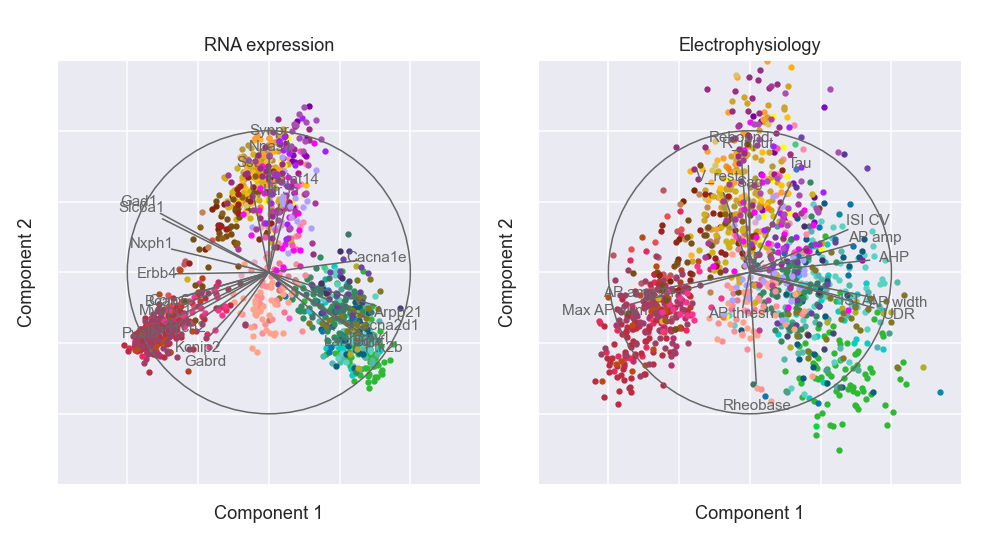

In [5]:
sparseRRR.bibiplot(X, Y, w, v, 
                   titles = ['RNA expression', 'Electrophysiology'],
                   cellTypes = data['ttype'], 
                   cellTypeColors = data['colors'], 
                   YdimsNames = data['ephysNames'], 
                   XdimsNames = genes)

1.......... Time: 0.0h  4m 25s


<IPython.core.display.Javascript object>


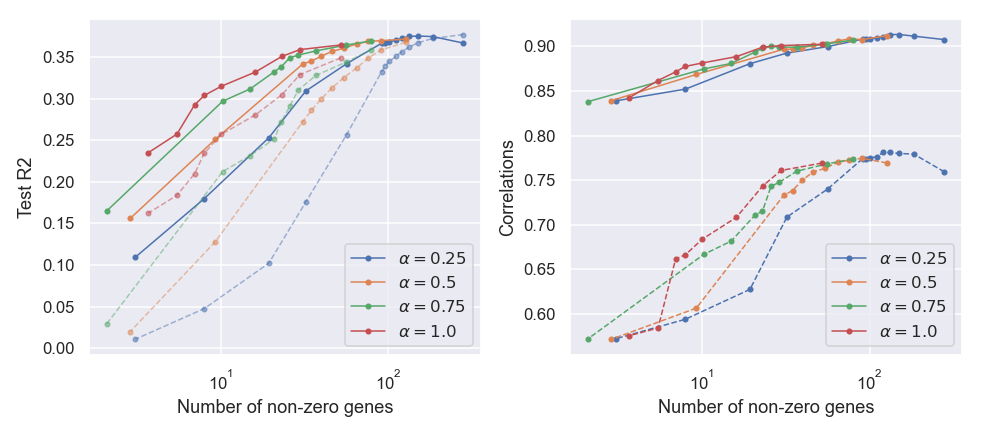

In [6]:
lambdas = np.concatenate((np.arange(.2,1.01,.1), np.arange(2,7)))
alphas = np.array([.25, .5, .75, 1])

cvResults = sparseRRR.elastic_rrr_cv(X, Y, alphas=alphas, lambdas=lambdas)

sparseRRR.plot_cv_results(*cvResults, alphas)

In [7]:
%time bootCounts = sparseRRR.elastic_rrr_bootstrap(X, Y, lambdau=.4, alpha=1)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(genes[args[i]], bootCounts[args[i]]))

.................................................................................................... 
CPU times: user 2min 34s, sys: 5.34 s, total: 2min 40s
Wall time: 40.2 s

Gad1       1.00
Synpr      1.00
Cacna2d1   1.00
Pvalb      1.00
Arpp21     0.99
Slc6a1     0.99
Ptk2b      0.98
Lamp5      0.98
Tac1       0.97
Gabrd      0.95
Plch2      0.95
Coro6      0.85
Bdnf       0.81
Sst        0.79
Kcnip2     0.77
Npas1      0.73
Cacna1e    0.71
Htr3a      0.71
Erbb4      0.65
Mybpc1     0.59


<IPython.core.display.Javascript object>


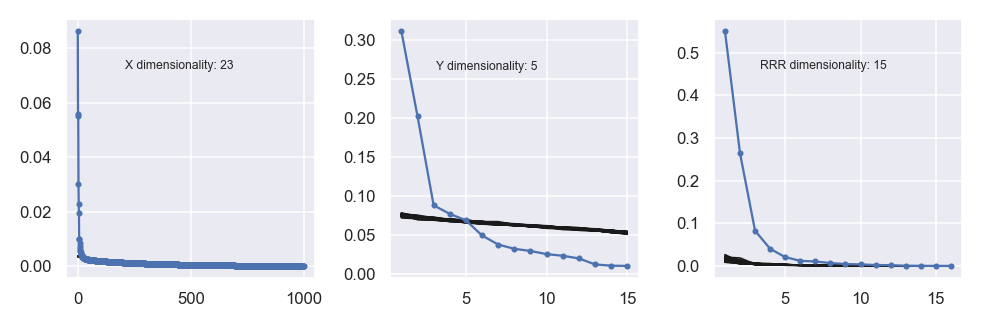

CPU times: user 4min 22s, sys: 3.21 s, total: 4min 25s
Wall time: 1min 6s


In [8]:
# A quick and dirty way to estimate the dimensionality

%time sparseRRR.dimensionality(X, Y)